In [1]:
%pip install scikit-learn
%pip install pandas
%pip install -U matplotlib
%pip install seaborn
%pip install ace-tools

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement ace-tools (from versions: none)
ERROR: No matching distribution found for ace-tools
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import joblib
import os 
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load the dataset
file_path = 'enriched_playlist_v2.csv'
data = pd.read_csv(file_path)
data = data[data['num_followers'] !=53519]

In [8]:
# Find the unique playlist_ids of the top 1000 playlists with the most followers
top_1000_playlist_ids = data.drop_duplicates(subset='playlist_id').nlargest(1000, 'num_followers')['playlist_id']

# Create a subset of the main dataset with only the top 1000 playlists
subset_data = data[data['playlist_id'].isin(top_1000_playlist_ids)]

# Save the subset data to a new CSV file
#subset_file_path = 'subset_top_1000_playlists.csv'
#subset_data.to_csv(subset_file_path, index=False)

# Display the top 5 records as a sample output
print(subset_data.head())

    playlist_id  num_followers                track_id         track_name  \
42          224              3  6hfZpvMQ2eu2pFJLE7KVLd  Boğaziçi Rüyaları   
43          224              3  1uUyPBaiAtHsTDtY2vvGMS         Yeni Hayat   
44          224              3  1fAMA1PWg0nnYLQQYcSSls      Speck Of Gold   
45          224              3  1NBRZFIFUyeUO6cVMjBHM1  Miracle Feat:Neve   
46          224              3  6cWlmDC8vU2WOMEID6ZL5K     Cry Me A River   

    artist_name  danceability  energy  key  loudness  mode  speechiness  \
42   Can Atilla         0.284   0.643    5    -6.376     1       0.0423   
43   Can Atilla         0.549   0.694    9    -7.364     0       0.0356   
44    Afterlife         0.667   0.656    4    -8.001     0       0.0894   
45    Afterlife         0.556   0.483    0    -7.948     0       0.0334   
46  Diana Krall         0.299   0.156    4   -13.794     0       0.0321   

    acousticness  instrumentalness  liveness  valence    tempo  duration_ms  
42      

In [9]:
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95493 entries, 42 to 1019148
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playlist_id       95493 non-null  int64  
 1   num_followers     95493 non-null  int64  
 2   track_id          95493 non-null  object 
 3   track_name        95493 non-null  object 
 4   artist_name       95493 non-null  object 
 5   danceability      95493 non-null  float64
 6   energy            95493 non-null  float64
 7   key               95493 non-null  int64  
 8   loudness          95493 non-null  float64
 9   mode              95493 non-null  int64  
 10  speechiness       95493 non-null  float64
 11  acousticness      95493 non-null  float64
 12  instrumentalness  95493 non-null  float64
 13  liveness          95493 non-null  float64
 14  valence           95493 non-null  float64
 15  tempo             95493 non-null  float64
 16  duration_ms       95493 non-null  int64  


In [10]:
# Separate features for normalization and standardization
features_to_normalize = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
features_to_standardize = ['loudness', 'tempo']

# Prepare features and labels
X = subset_data[['danceability', 'energy', 'loudness', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = subset_data['num_followers']

# Apply MinMaxScaler for normalization
scaler_norm = MinMaxScaler()
X.loc[:, features_to_normalize] = scaler_norm.fit_transform(X[features_to_normalize])

# Apply StandardScaler for standardization
scaler_std = StandardScaler()
X.loc[:, features_to_standardize] = scaler_std.fit_transform(X[features_to_standardize])

/tmp/ipykernel_1753/3286052520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, features_to_normalize] = scaler_norm.fit_transform(X[features_to_normalize])
/tmp/ipykernel_1753/3286052520.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, features_to_standardize] = scaler_std.fit_transform(X[features_to_standardize])


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 10489.14463624272
R^2 Score: 0.0012672051267512696
                  Coefficient
danceability        -1.814131
energy              -2.785262
loudness             0.786518
speechiness        -26.889807
acousticness         1.596328
instrumentalness   -11.002198
liveness            -3.437698
valence             -3.130909
tempo               -0.125942


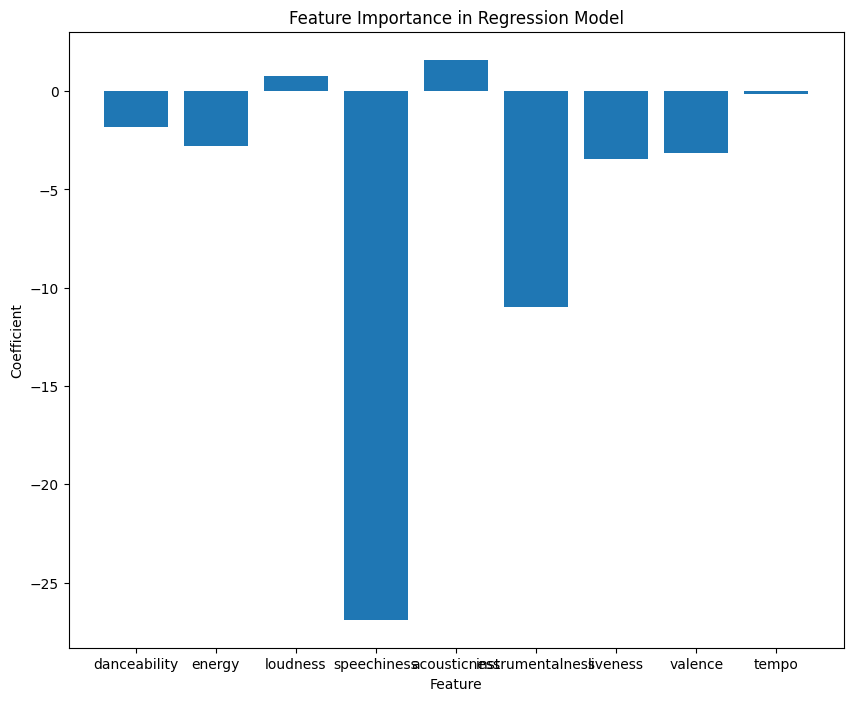

In [12]:
# Plot the coefficients to show feature importance
plt.figure(figsize=(10, 8))
plt.bar(coefficients.index, coefficients['Coefficient'])
plt.title('Feature Importance in Regression Model')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

In [3]:
import pandas as pd

# Load the subset data
subset_file_path = 'subset_top_1000_playlists.csv'
data = pd.read_csv(subset_file_path)

# Define the features of interest
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Group by 'playlist_id' and compute mean, std, and variance for each feature
grouped = data.groupby('playlist_id')[features]

means = grouped.mean().reset_index()
std_devs = grouped.std().reset_index()
variances = grouped.var().reset_index()

# Merge the results into a single DataFrame
stats = pd.merge(means, std_devs, on='playlist_id', suffixes=('_mean', '_std'))
stats = pd.merge(stats, variances, on='playlist_id', suffixes=('', '_var'))

# Rename columns for clarity
stats.columns = ['playlist_id'] + [f'{feature}_mean' for feature in features] + \
                [f'{feature}_std' for feature in features] + \
                [f'{feature}_var' for feature in features]



print(stats.head())


   playlist_id  danceability_mean  energy_mean  loudness_mean  \
0          224           0.542122     0.516961      -9.101704   
1         2050           0.682667     0.551505      -9.888323   
2         2724           0.616835     0.525541      -9.556937   
3         4017           0.555447     0.549084      -9.667246   
4         5472           0.582512     0.537310      -7.215250   

   speechiness_mean  acousticness_mean  instrumentalness_mean  liveness_mean  \
0          0.050021           0.438457               0.123159       0.186457   
1          0.058531           0.299625               0.163986       0.135645   
2          0.088887           0.345142               0.130433       0.144148   
3          0.057625           0.481217               0.028518       0.215198   
4          0.078018           0.409495               0.019910       0.134157   

   valence_mean  tempo_mean  ...  tempo_std  danceability_var  energy_var  \
0      0.403854  121.563174  ...  29.775463        

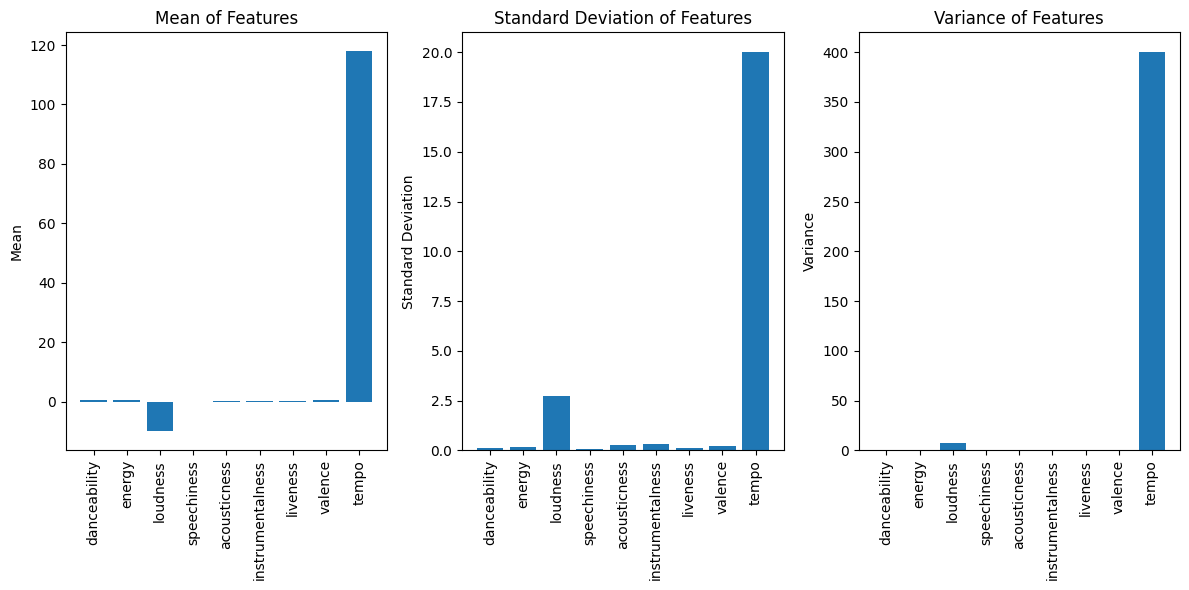

In [5]:
selected_playlist_id = stats.iloc[1]['playlist_id']

# Filter the statistics for the selected playlist
selected_stats = stats[stats['playlist_id'] == selected_playlist_id]

# Extract mean, std, and variance for the selected playlist
means = selected_stats[[f'{feature}_mean' for feature in features]].values.flatten()
std_devs = selected_stats[[f'{feature}_std' for feature in features]].values.flatten()
variances = selected_stats[[f'{feature}_var' for feature in features]].values.flatten()

# Plot the mean, std, and variance
x = range(len(features))
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(x, means)
plt.xticks(x, features, rotation=90)
plt.title('Mean of Features')
plt.ylabel('Mean')

plt.subplot(1, 3, 2)
plt.bar(x, std_devs)
plt.xticks(x, features, rotation=90)
plt.title('Standard Deviation of Features')
plt.ylabel('Standard Deviation')

plt.subplot(1, 3, 3)
plt.bar(x, variances)
plt.xticks(x, features, rotation=90)
plt.title('Variance of Features')
plt.ylabel('Variance')

plt.tight_layout()
plt.show()

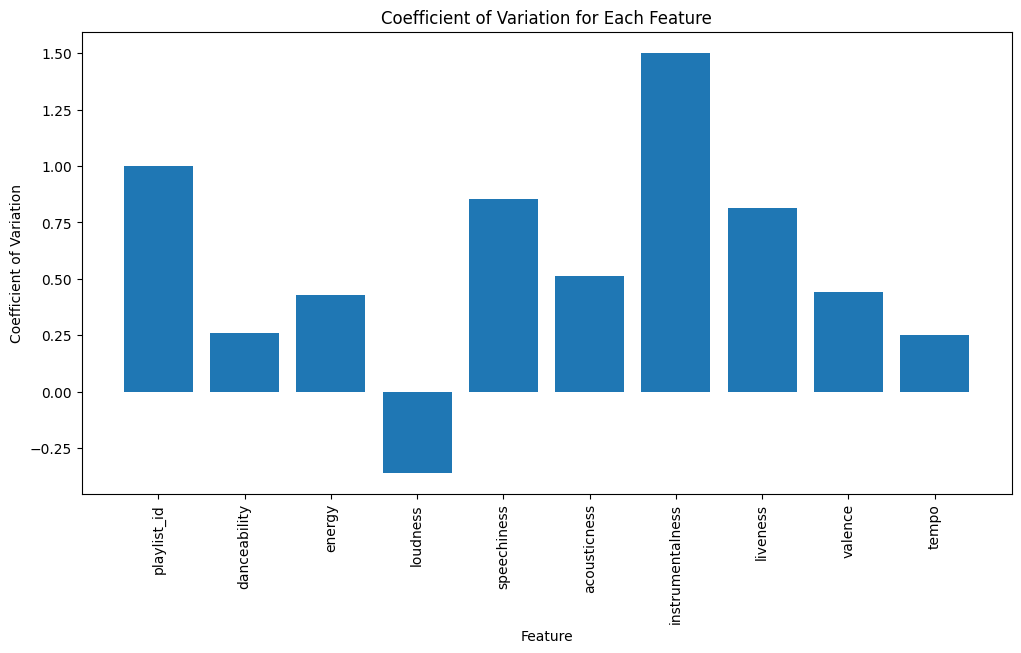

Coefficient of Variation for Each Feature:
 playlist_id         1.000000
danceability        0.258162
energy              0.429091
loudness           -0.358961
speechiness         0.855513
acousticness        0.511203
instrumentalness    1.501772
liveness            0.813180
valence             0.439664
tempo               0.249320
dtype: float64


In [2]:
# Load the subset data
subset_file_path = 'subset_top_1000_playlists.csv'
data = pd.read_csv(subset_file_path)

# Define the features of interest
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Group by 'playlist_id' and compute mean and std for each feature
grouped = data.groupby('playlist_id')[features]
means = grouped.mean().reset_index()
std_devs = grouped.std().reset_index()

# Calculate the coefficient of variation (CV) for each feature across all playlists
cv = std_devs.mean() / means.mean()

# Plot the coefficient of variation for each feature
plt.figure(figsize=(12, 6))
plt.bar(cv.index, cv)
plt.title('Coefficient of Variation for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=90)
plt.show()

# Print the coefficient of variation values
print("Coefficient of Variation for Each Feature:\n", cv)

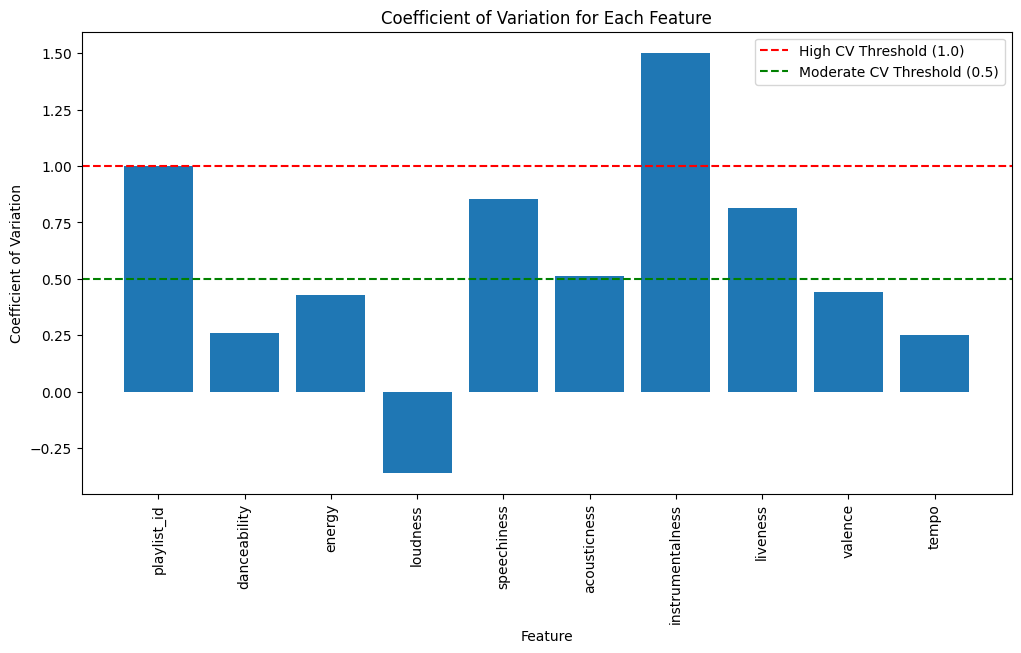

Coefficient of Variation for Each Feature:
 playlist_id         1.000000
danceability        0.258162
energy              0.429091
loudness           -0.358961
speechiness         0.855513
acousticness        0.511203
instrumentalness    1.501772
liveness            0.813180
valence             0.439664
tempo               0.249320
dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the subset data
subset_file_path = 'subset_top_1000_playlists.csv'
data = pd.read_csv(subset_file_path)

# Define the features of interest
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Group by 'playlist_id' and compute mean and std for each feature
grouped = data.groupby('playlist_id')[features]
means = grouped.mean().reset_index()
std_devs = grouped.std().reset_index()

# Calculate the coefficient of variation (CV) for each feature across all playlists
cv = std_devs.mean() / means.mean()

# Plot the coefficient of variation for each feature
plt.figure(figsize=(12, 6))
plt.bar(cv.index, cv)
plt.title('Coefficient of Variation for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=90)
plt.axhline(y=1, color='r', linestyle='--', label='High CV Threshold (1.0)')
plt.axhline(y=0.5, color='g', linestyle='--', label='Moderate CV Threshold (0.5)')
plt.legend()
plt.show()

# Print the coefficient of variation values
print("Coefficient of Variation for Each Feature:\n", cv)


Mean Squared Error: 2846487.3724099486
R^2 Score: 0.00282709695194594
                          Coefficient
danceability_feature        31.282234
energy_feature             221.893137
loudness_feature           -75.479421
speechiness_feature         12.583752
acousticness_feature       119.327379
liveness_feature           -63.380627
valence_feature             31.323107
tempo_feature              -32.048733
instrumentalness_feature   309.300892


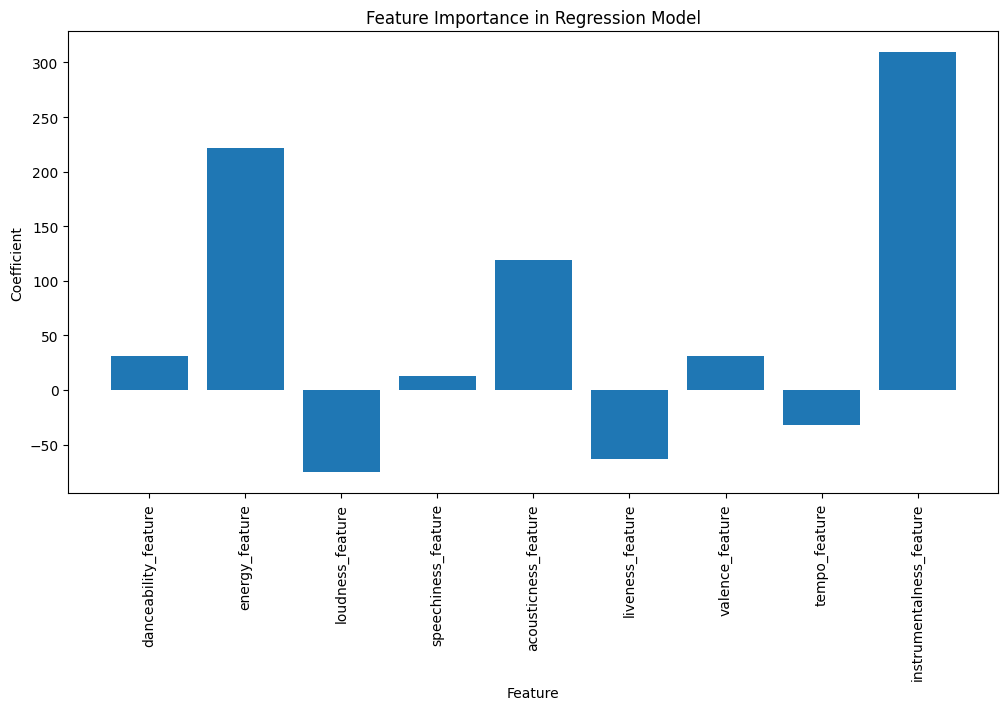

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the subset data
subset_file_path = 'subset_top_1000_playlists.csv'
data = pd.read_csv(subset_file_path)

# Remove the outlier (playlist with the most followers)
outlier = data['num_followers'].idxmax()
data = data.drop(index=outlier)

# Define the features of interest
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Group by 'playlist_id' and compute mean and std for each feature
grouped = data.groupby('playlist_id')[features]
means = grouped.mean().reset_index()
std_devs = grouped.std().reset_index()

# Calculate the coefficient of variation (CV) for each feature across all playlists
cv = std_devs.mean() / means.mean()

# Threshold for high CV
high_cv_threshold = 1.0

# Initialize a dictionary to store the new features
new_features = pd.DataFrame(index=data.index)

# Create new features: use mean for low CV, and std deviation for high CV
for feature in features:
    if cv[feature] > high_cv_threshold:
        new_features[f'{feature}_feature'] = data.groupby('playlist_id')[feature].transform('std')
    else:
        new_features[f'{feature}_feature'] = data.groupby('playlist_id')[feature].transform('mean')

# Add the new features to the original dataframe
data = pd.concat([data, new_features], axis=1)

# Prepare features and labels for regression
mean_features = [f'{feature}_feature' for feature in features if cv[feature] <= high_cv_threshold]
std_features = [f'{feature}_feature' for feature in features if cv[feature] > high_cv_threshold]

# Standardize only the mean-derived features
scaler = StandardScaler()
data[mean_features] = scaler.fit_transform(data[mean_features])

# Combine the features for regression
X = data[mean_features + std_features]
y = data['num_followers']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plot the coefficients to show feature importance
plt.figure(figsize=(12, 6))
plt.bar(coefficients.index, coefficients['Coefficient'])
plt.title('Feature Importance in Regression Model')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.show()
